In [87]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
%matplotlib inline
from numpy.random import RandomState
import copy
import csv

from sklearn.neighbors import NearestNeighbors

In [88]:
data_train = pd.read_excel(r'A:\PROGRAMMING\Log analysis with IPython\DMP_for_test.xlsx')

In [89]:
data_train.shape

(33857, 10)

In [90]:
data_train.describe(include = 'all')

,time,cookie,uid,resolution_w,resolution_h,event,os,browser,gamecode,gametype
count,33857,33857,23472,33857.000000,33857.000000,33857,33857,33857,26845,26845
unique,23792,3165,98,NaN,NaN,8,15,11,89,2
top,13:00:34,V5XZi8822CzRnw,10287698587830,NaN,NaN,round,Windows7,Chrome,book_of_ra2_gift,real
freq,10,3648,4235,NaN,NaN,26254,14935,16996,4346,18623
mean,NaN,NaN,NaN,1352.407183,856.188853,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,381.823663,154.836394,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,320.000000,320.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1024.000000,768.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1280.000000,800.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1600.000000,1024.000000,NaN,NaN,NaN,NaN,NaN


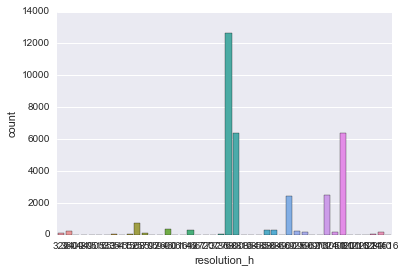

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
# preferred continent destinations
sns.countplot(x='resolution_h', data=data_train)
sns.plt.show()

In [92]:
# plot all columns countplots
def show_four_histograms(to_show, data):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,12))
    fig.tight_layout()
    i = 0
    j = 0
    for col in to_show:
        if j >= 2:
            j = 0
            i += 1
        # avoid to plot by date    
        #if data_train[col].dtype == np.int64:
        sns.countplot(x=col, data=data, ax=axes[i][j], label = col)
        j += 1
    sns.plt.show()

In [93]:
def show_two_histograms(to_show, data):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
    fig.tight_layout()
    sns.countplot(x=to_show[0], data=data, ax=axes[0], label = to_show[0])
    sns.countplot(x=to_show[1], data=data, ax=axes[1], label = to_show[1])
    sns.plt.show()

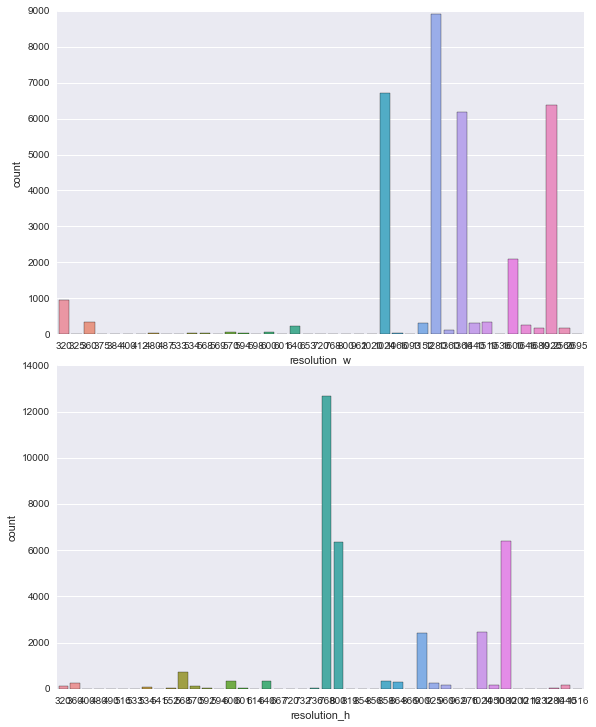

In [94]:
show_two_histograms(['resolution_w', 'resolution_h'], data_train)

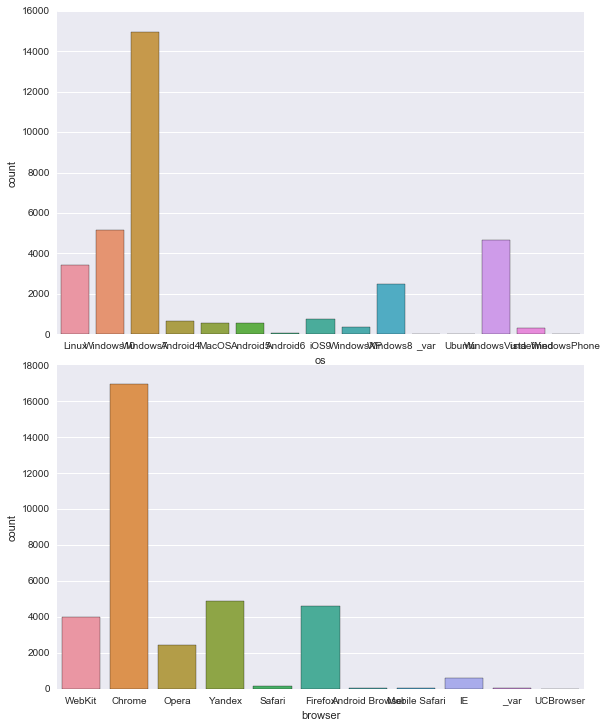

In [95]:
show_two_histograms(['os', 'browser'], data_train)

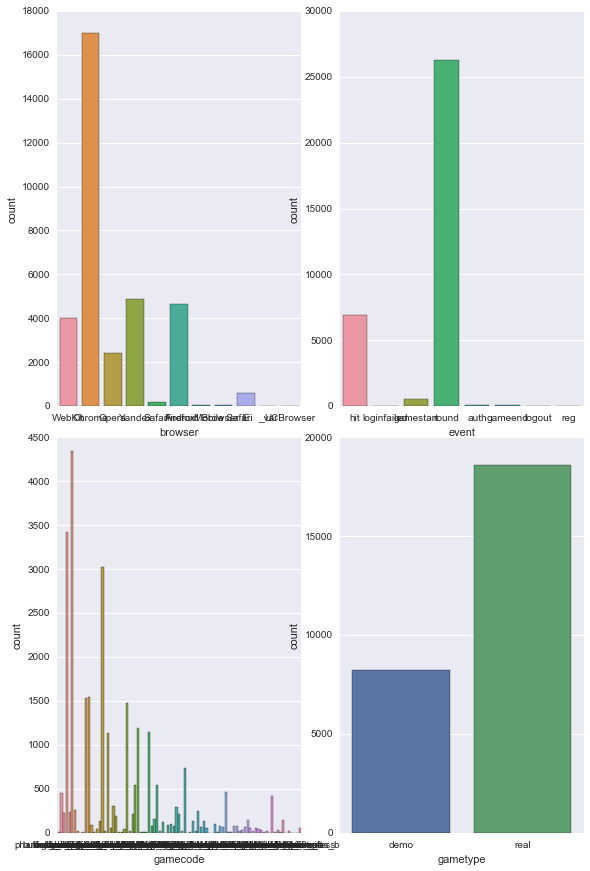

In [96]:
show_four_histograms(['browser', 'event', 'gamecode', 'gametype'], data_train)

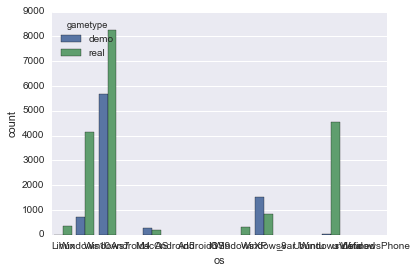

In [97]:
# distribution of gametype for different OS
sns.countplot(x='os', hue='gametype', data = data_train)
sns.plt.show()

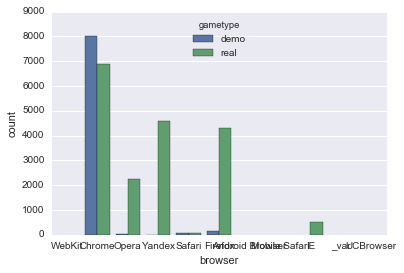

In [98]:
# distribution of gametype for different Browser
sns.countplot(x='browser', hue='gametype', data = data_train)
sns.plt.show()

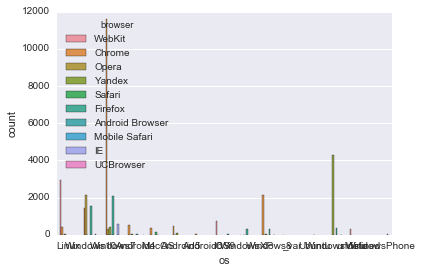

In [99]:
# distribution of browser used for different OS
sns.countplot(x='os', hue='browser', data = data_train)
sns.plt.show()

In [100]:
print(sum(data_train.gametype == 'real'))
print(sum(data_train.gametype == 'demo'))

18623
8222


In [101]:
data_train.count()

time            33857
cookie          33857
uid             23472
resolution_w    33857
resolution_h    33857
event           33857
os              33857
browser         33857
gamecode        26845
gametype        26845
dtype: int64

In [102]:
# find gamecodes that are used for demo and for real gaming:
demo_data = data_train[data_train.gametype == 'demo']
real_data = data_train[data_train.gametype == 'real']

In [103]:
games_used_for_demo_and_real = list(set(demo_data.gamecode).intersection(real_data.gamecode))
events_for_demo = list(set(demo_data.event))
events_for_real = list(set(real_data.event))
print('Gamecodes that are present for both, DEMO and REAL gaming:\n', games_used_for_demo_and_real)
print('\nDifferent events for demo and for real gaming: ', events_for_demo, events_for_real)

Gamecodes that are present for both, DEMO and REAL gaming:
 ['wild_hunter_b', 'roulette_with_track', 'blackjack_vabank', 'fantastic_four', 'french_roulette_track', 'faust', 'moorhuhn', 'book_of_ra_deluxe_6reels', 'crazy_monkey_deluxe', 'book_of_maya', 'burlesque_queen', 'king_of_cards', 'crazy_fruit_urartu', 'lucky_ladies_charm2_gift', 'incredible_hulk_gift', 'riches_of_cleopatra', 'magic_forest_b', 'dolphins_pearl2_o_gift', 'caribbeanpoker', 'roulette', 'resident2', 'crazy_monkey_gift', 'fairy_land', 'lord_ocean_deluxe', 'book_of_ra2_gift', 'book_of_ra2_deluxe', 'fruit_cocktail', 'aquatica_b']

Different events for demo and for real gaming:  ['gamestart', 'round', 'gameend'] ['round', 'gamestart', 'gameend']


In [104]:
print(demo_data.shape, real_data.shape)

(8222, 10) (18623, 10)


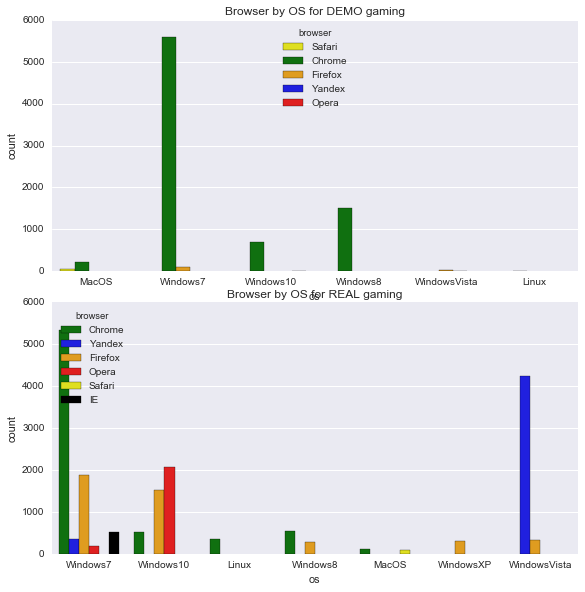

In [105]:
## Distribution of browser used by OS for DEMO and for REAL gaming:

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))
fig.tight_layout()
colors = {'Chrome':'green', 'Safari': 'yellow', 'Firefox' : 'orange', 'Yandex':'blue', 'IE':'black', 'Opera':'red'}
sns.countplot(x='os', hue='browser', data=demo_data, ax=axes[0], palette = colors)
axes[0].set_title('Browser by OS for DEMO gaming')
sns.countplot(x='os', hue='browser', data=real_data, ax=axes[1], palette = colors)
axes[1].set_title('Browser by OS for REAL gaming')
sns.plt.show()

In [106]:


## LET'S ADD DAY PERIOD FEATURE
## let 0-6 is 'night' - 0, 6-12 is 'morning' - 1, 12-18 is 'day' - 2, 18-24 is 'evening' - 3
import datetime
time_period = list()
for i in range(data_train.shape[0]):
    if data_train.time[i] < datetime.time(6, 0, 0):
        time_period.append(0)
    elif datetime.time(6, 0, 0) <= data_train.time[i] < datetime.time(12, 0, 0):
        time_period.append(1)
    elif datetime.time(12, 0, 0) <= data_train.time[i] < datetime.time(18, 0, 0):
        time_period.append(2)
    else:
        time_period.append(3)
data_train['time_period'] = time_period

## drop NAs
cleaned_data = data_train.dropna()

In [107]:
### use label encoder to create numerical categorical variables:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['os', 'browser', 'gamecode', 'gametype']
for f in categorical_features:
    lbl_enc = LabelEncoder()
    new_feature_name = f + '_ix'
    cleaned_data[new_feature_name] = lbl_enc.fit_transform(cleaned_data[f])
    

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


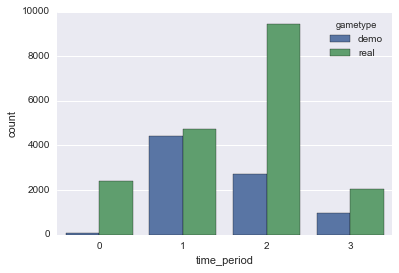

In [108]:
## Investigate day_period:
# distribution of gametype for different OS
sns.countplot(x='time_period', hue='gametype', data = data_train)
sns.plt.show()


In [109]:
## DISTRIBUTION OF GAMES DURING THE DAY:
night = set(cleaned_data[cleaned_data.time_period == 0].gamecode)
morning = set(cleaned_data[cleaned_data.time_period == 1].gamecode)
day = set(cleaned_data[cleaned_data.time_period == 2].gamecode)
evening = set(cleaned_data[cleaned_data.time_period == 3].gamecode)
print('Games that are played in ALL the periods:\n',
list(night.intersection(day).intersection(morning).intersection(evening)))
print('\nGames that are played in the NIGHT AND in the DAY:\n',night.intersection(day))
print('\nGames that are played ONLY in the NIGHT:\n', night - day - morning - evening)
print('\nGames that are played ONLY in the DAY:\n', day - night - morning - evening)
print('\nGames that are played ONLY in the MORNING:\n', morning - day - night - evening)
print('\nGames that are played ONLY in the EVENING:\n', evening - day - night - morning)

Games that are played in ALL the periods:
 ['crazy_monkey_gift', 'roulette', 'book_of_ra2_gift']

Games that are played in the NIGHT AND in the DAY:
 {'book_of_maya', 'burlesque_queen', 'lord_ocean_deluxe', 'book_of_ra2_gift', 'iron_man_3', 'gonzo_quest', 'pharaonsrings_deluxe', 'fruit_cocktail', 'fruit_sensation_deluxe', 'roulette', 'faust', 'lucky_ladies_charm2_gift', 'safari_heat', 'draculas_family_a', 'elven_princess', 'pirate2', 'crazy_monkey_gift'}

Games that are played ONLY in the NIGHT:
 {'banana_splash2', 'king_of_cards', 'reel_attraction'}

Games that are played ONLY in the DAY:
 {'spinning_fruits', 'book_of_stars', 'jackpot_crown_deluxe', 'lucky_ladies_charm2_deluxe', 'fairyqueen_deluxe', 'circus_hd', 'golden_sevens_deluxe', 'notre_dames', 'diamond_trio', 'nightout', 'blood_suckers', 'moneygame2_o', 'sevenswild', 'sweet_life2', 'always_hot_deluxe', 'sizzling_hot_quatro', 'deuceswild', 'desert_treasures', 'dolphins_pearl2_o_gift', 'beetlmania_deluxe', 'aces_and_faces', 'deuc

In [110]:
## LET'S PREIDCT GAME TYPE WITHOUT GAME CODE :

import sklearn.metrics
from sklearn.utils import shuffle
from sklearn import cross_validation as cv
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [111]:
features_to_predict_gametype = ['os_ix', 'browser_ix', 'resolution_w', 'resolution_h', 'gamecode_ix', 'time_period']
skf = cv.StratifiedKFold(cleaned_data['gametype_ix'], n_folds=10, shuffle=True)
cv.cross_val_score(RandomForestClassifier(), cleaned_data[features_to_predict_gametype], 
                   cleaned_data['gametype_ix'], cv=skf, )

array([ 0.99486741,  0.99358426,  0.99144568,  0.99400941,  0.98930252,
        0.99186992,  0.98801883,  0.99229782,  0.98801883,  0.9927226 ])

In [112]:
import xgboost as xgb
from xgboost import XGBClassifier

In [113]:
features_to_predict_gametype = ['os_ix','browser_ix', 'resolution_w', 'resolution_h', 'time_period']
#features_to_predict_gametype = ['browser_ix',]
X, y = shuffle(cleaned_data[features_to_predict_gametype], cleaned_data['gametype_ix'])
#skf = cv.StratifiedKFold(y, n_folds=10, shuffle=True)
score_metric = 'accuracy'
def score_model(model):
    return cv.cross_val_score(model, X, y, cv=10, scoring=score_metric)
for model in [XGBClassifier(), ExtraTreesClassifier(), RandomForestClassifier()]:
    print(score_model(model))

[ 0.98545766  0.98417451  0.98289136  0.98416774  0.98630723  0.98373984
  0.98844673  0.98459564  0.98587933  0.98116438]
[ 0.98545766  0.98417451  0.98289136  0.98416774  0.98630723  0.98373984
  0.98844673  0.98459564  0.98587933  0.98116438]
[ 0.98545766  0.98417451  0.98289136  0.98416774  0.98630723  0.98373984
  0.98844673  0.98459564  0.98587933  0.98116438]


In [114]:
cleaned_data.corr()

,resolution_w,resolution_h,time_period,os_ix,browser_ix,gamecode_ix,gametype_ix
resolution_w,1.000000,0.815010,0.119446,-0.414297,-0.039691,-0.084726,0.074466
resolution_h,0.815010,1.000000,0.085293,-0.367654,-0.113309,0.017866,-0.222174
time_period,0.119446,0.085293,1.000000,0.177907,0.118424,-0.076048,0.161922
os_ix,-0.414297,-0.367654,0.177907,1.000000,0.549038,0.045744,0.160718
browser_ix,-0.039691,-0.113309,0.118424,0.549038,1.000000,0.015586,0.377230
gamecode_ix,-0.084726,0.017866,-0.076048,0.045744,0.015586,1.000000,0.099180
gametype_ix,0.074466,-0.222174,0.161922,0.160718,0.377230,0.099180,1.000000


In [115]:
cleaned_data['prediction_gametype_by_XGB'] = cv.cross_val_predict(XGBClassifier(),
                    cleaned_data[features_to_predict_gametype], cleaned_data['gametype_ix'], cv=skf)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


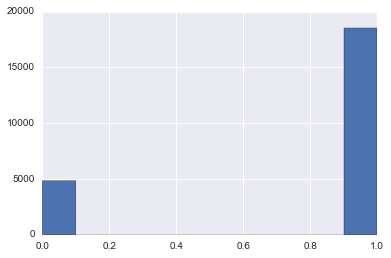

In [116]:
plt.hist(cleaned_data['prediction_gametype_by_XGB'])
plt.show()

In [117]:
from sklearn.feature_selection import SelectKBest
kbest = SelectKBest(k = len(features_to_predict_gametype)).fit(cleaned_data[features_to_predict_gametype],cleaned_data['gametype_ix'])
sorted(zip(kbest.scores_,features_to_predict_gametype), reverse=True)

[(3877.3638849470181, 'browser_ix'),
 (1213.473032394402, 'resolution_h'),
 (629.22659782964604, 'time_period'),
 (619.65749579672604, 'os_ix'),
 (130.31321994712394, 'resolution_w')]

In [118]:
cleaned_data.corr()

,resolution_w,resolution_h,time_period,os_ix,browser_ix,gamecode_ix,gametype_ix,prediction_gametype_by_XGB
resolution_w,1.000000,0.815010,0.119446,-0.414297,-0.039691,-0.084726,0.074466,0.090203
resolution_h,0.815010,1.000000,0.085293,-0.367654,-0.113309,0.017866,-0.222174,-0.205723
time_period,0.119446,0.085293,1.000000,0.177907,0.118424,-0.076048,0.161922,0.183272
os_ix,-0.414297,-0.367654,0.177907,1.000000,0.549038,0.045744,0.160718,0.162292
browser_ix,-0.039691,-0.113309,0.118424,0.549038,1.000000,0.015586,0.377230,0.381777
gamecode_ix,-0.084726,0.017866,-0.076048,0.045744,0.015586,1.000000,0.099180,0.106713
gametype_ix,0.074466,-0.222174,0.161922,0.160718,0.377230,0.099180,1.000000,0.953084
prediction_gametype_by_XGB,0.090203,-0.205723,0.183272,0.162292,0.381777,0.106713,0.953084,1.000000


In [119]:
18/(8+18)

0.6923076923076923

In [120]:
### Let's investigate how Browser may impact on hit and loginfailed actions:

In [121]:
print(sum(data_train.event == 'hit'))
print(sum(data_train.event == 'loginfailed'))

6901
12


In [122]:
data_train[data_train.event == 'loginfailed']

,time,cookie,uid,resolution_w,resolution_h,event,os,browser,gamecode,gametype,time_period
69,00:19:00,V2e_l4787CAex_,NaN,2560,1440,loginfailed,MacOS,Safari,NaN,NaN,0
6123,08:16:59,V5KmM1088CAM-U,56b856073b4569,320,570,loginfailed,Android4,Chrome,NaN,NaN,1
9844,10:15:04,V4r5h7561CXIck,NaN,320,570,loginfailed,Android5,Yandex,NaN,NaN,1
9852,10:15:15,V4r5h7561CXIck,NaN,320,570,loginfailed,Android5,Yandex,NaN,NaN,1
9864,10:15:33,V4r5h7561CXIck,NaN,320,570,loginfailed,Android5,Yandex,NaN,NaN,1
21850,14:36:25,V4aWc116CnRXQ,NaN,360,640,loginfailed,Android5,Chrome,NaN,NaN,2
22047,14:43:45,V4aWc116CnRXQ,NaN,360,640,loginfailed,Android5,Chrome,NaN,NaN,2
23165,15:10:59,V5YhI4610CQH0E,NaN,1024,552,loginfailed,Android4,Chrome,NaN,NaN,2
23173,15:11:08,V5YhI4610CQH0E,NaN,1024,552,loginfailed,Android4,Chrome,NaN,NaN,2
31519,21:48:56,V5aJB2504C4MLL,NaN,480,800,loginfailed,WindowsPhone,_var,NaN,NaN,3


In [123]:
hit_data = data_train[data_train.event == 'hit']

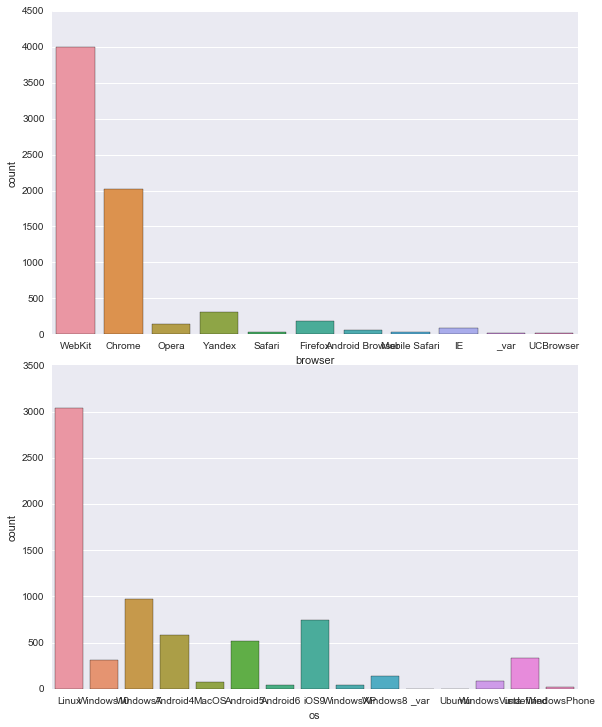

In [124]:
show_two_histograms(['browser', 'os'], hit_data)

In [125]:
hit_data.describe(include = 'all')

,time,cookie,uid,resolution_w,resolution_h,event,os,browser,gamecode,gametype,time_period
count,6901,6901,0,6901.000000,6901.000000,6901,6901,6901,0,0,6901.000000
unique,6479,3163,0,NaN,NaN,1,15,11,0,0,NaN
top,17:58:39,20160905163982,NaN,NaN,NaN,hit,Linux,WebKit,NaN,NaN,NaN
freq,7,718,NaN,NaN,NaN,6901,3038,4004,NaN,NaN,NaN
mean,NaN,NaN,NaN,974.007100,742.998261,NaN,NaN,NaN,NaN,NaN,1.572671
std,NaN,NaN,NaN,406.526826,163.379399,NaN,NaN,NaN,NaN,NaN,1.006271
min,NaN,NaN,NaN,320.000000,320.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,962.000000,640.000000,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,1024.000000,768.000000,NaN,NaN,NaN,NaN,NaN,2.000000
75%,NaN,NaN,NaN,1024.000000,768.000000,NaN,NaN,NaN,NaN,NaN,2.000000


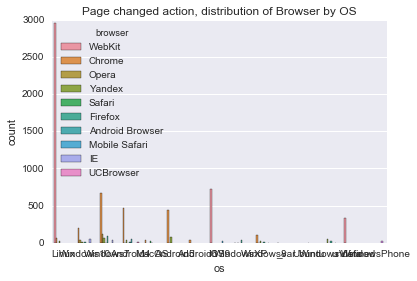

In [126]:
# distribution of gametype for different Browser
sns.countplot(x='os', hue='browser', data = hit_data)
sns.plt.title('Page changed action, distribution of Browser by OS')
sns.plt.show()

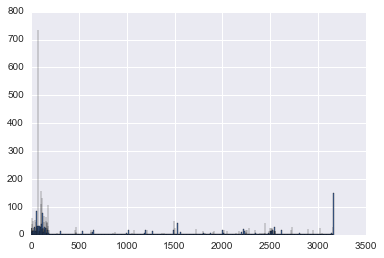

In [127]:
plt.hist(LabelEncoder().fit_transform(hit_data.cookie), bins = 1000)
plt.show()

In [128]:
grouped_hit = hit_data.groupby('cookie').agg({'time': pd.Series.nunique,
                        'os': pd.Series.tolist}).sort(columns = 'time', ascending = False)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


aaa

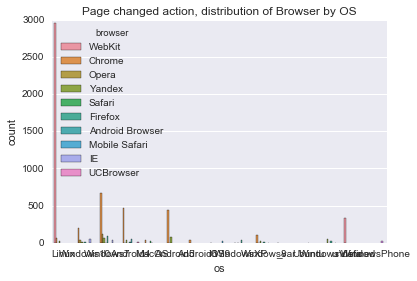

In [129]:
# distribution of gametype for different Browser without most active user of iOS9:
sns.countplot(x='os', hue='browser', data = hit_data[hit_data.cookie != '20160905163982'])
sns.plt.title('Page changed action, distribution of Browser by OS')
sns.plt.show()

In [130]:
## picture is the same

In [131]:
## let's add day period names 
def day_period_name(x):
    if x==0:
        return 'night'
    elif x==1:
        return 'morning'
    elif x==2:
        return 'day'
    else:
        return 'evening'
data_train['period_of_day'] = data_train.time_period.apply(day_period_name)

## Let's take only data for users which did some actions in the game

In [132]:
gaming_data = data_train[data_train.event == 'round']

In [133]:
gaming_data['time_min'] = gaming_data.time
gaming_data['time_max'] = gaming_data.time

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### group by cookie to define the most active users

In [134]:
gaming_data['Number of different actions'] = gaming_data.time
gaming_data['Number of games'] = gaming_data.gamecode
gaming_data['Periods of the day'] = gaming_data.period_of_day
grouped_gaming = gaming_data.groupby('cookie').agg({'Number of different actions': pd.Series.nunique,                                                    
                                                    'os': pd.Series.unique, 
                                                    'browser': pd.Series.unique,
                                                    'Periods of the day' : pd.Series.unique,
                                                    'Number of games': pd.Series.nunique,
                                                     'time_min': pd.Series.min, 
                                                    'time_max': pd.Series.max,
                                                   }).sort(columns = 'Number of different actions', ascending = False)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [135]:
grouped_gaming[:10]

,os,Number of different actions,time_max,browser,time_min,Periods of the day,Number of games
cookie,,,,,,,
V5XZi8822CzRnw,WindowsVista,2649,15:35:38,Yandex,10:50:13,"[morning, day]",12
V5X-E8911CfhbU,Windows10,2066,16:30:34,Opera,12:01:25,day,3
20151602895315,Windows10,1521,10:34:48,Firefox,02:33:58,"[night, morning]",1
20151952361768,Windows7,1384,21:04:50,Chrome,09:34:10,"[morning, day, evening]",1
V2FMP5536Ck-FA,Windows7,1243,15:10:06,Chrome,00:37:38,"[night, day]",21
V5aWN678C9xMp,Windows7,1159,23:59:58,Chrome,00:00:01,"[evening, night]",1
V2EJG8079CIMPi,Windows7,1106,12:13:03,Chrome,08:31:53,"[morning, day]",3
V3-ew5240C8vce,Windows7,1039,17:27:44,Chrome,07:01:55,"[morning, day]",2
V5XWy8728CKgMA,Windows7,949,12:06:12,Firefox,09:35:11,"[morning, day]",5


In [139]:
#dir(pd.Series)

### Define the most played game

In [137]:
gaming_data['OS used'] = gaming_data.os
gaming_data['Number of users who play game'] = copy.deepcopy(gaming_data.cookie)
grouped_gaming = gaming_data.groupby('gamecode').agg({'Number of users who play game': pd.Series.nunique, 
                                                    'OS used': pd.Series.unique, 
                                                    'Periods of the day' : pd.Series.unique,
                                                   }).sort(columns = 'Number of users who play game', ascending = False)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [138]:
grouped_gaming[:10]

,Number of users who play game,OS used,Periods of the day
gamecode,,,
roulette,19,"[Windows7, WindowsXP, Windows8, Windows10, MacOS]","[night, morning, day, evening]"
book_of_ra2_gift,12,"[Windows7, Linux, Windows8, Windows10, MacOS]","[night, morning, day, evening]"
crazy_monkey_gift,9,"[Windows7, Windows8, WindowsVista]","[night, morning, day, evening]"
fruit_cocktail,8,"[Windows7, WindowsVista, Windows8]","[night, morning, day]"
lucky_ladies_charm2_gift,6,"[Windows7, WindowsVista, Windows8]","[night, day]"
incredible_hulk_gift,5,"[Windows7, WindowsVista, Windows8, MacOS]","[morning, day]"
book_of_ra2_deluxe,5,"[Windows7, Windows10, Windows8]","[morning, day]"
fairy_land,5,"[Windows7, WindowsVista, Windows8]","[morning, day]"
roulette_with_track,5,"[Windows7, Windows10, MacOS]","[morning, day]"


In [147]:
cleaned_data.cookie.nunique()

64

In [146]:
data_train.cookie.nunique()

3165

In [149]:
gaming_data.shape

(26254, 19)

In [150]:
24000*0.98

23520.0